# Projeto 3 - Clusterização

SCC5809 - Redes Neurais Artificiais e Aprendizado Profundo

**Nome**:  - **NUSP**: 

## Bibliotecas

In [18]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Pré-processamento de dados

In [2]:
cols = ['class', 'alcohol', 'malic acid', 'ash', 'alkalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD', 'proline']

# Carregando o dataset atraves do pandas
wine_df = pd.read_csv('wine.data', names=cols)
wine_df.head()

,class,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
labels_df = wine_df['class']
labels_df.head()

,class
0,1
1,1
2,1
3,1
4,1


In [4]:
# classificando a variavel resposta
wine_df['class'] = wine_df['class'].astype('category')
wine_df = pd.get_dummies(wine_df, columns=['class'])
wine_df.head()

,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline,class_1,class_2,class_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True,False,False
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,True,False,False
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,True,False,False
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,True,False,False
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,True,False,False


In [5]:
# Normalização
scaler = MinMaxScaler()
wine_norm = scaler.fit_transform(wine_df)
wine_norm = pd.DataFrame(wine_norm)
wine_norm.columns = wine_df.columns
wine_norm.head()

,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline,class_1,class_2,class_3
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1.0,0.0,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1.0,0.0,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1.0,0.0,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1.0,0.0,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1.0,0.0,0.0


In [6]:
# Separando as features e labels
wine_X = wine_norm.drop(columns=['class_1','class_2','class_3'])
wine_y = wine_norm[['class_1','class_2','class_3']]
wine_X.head()

,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [7]:
wine_X.shape

(178, 13)

In [8]:
wine_y.head()

,class_1,class_2,class_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [9]:
wine_y.shape

(178, 3)

## Reduzindo a dimensão do dataset com PCA

In [10]:
pca = PCA(n_components = 3)
pca.fit(wine_X)
wine_X_pca = pca.transform(wine_X)
wine_X_pca = pd.DataFrame(wine_X_pca,columns=['PC1','PC2','PC3'])
wine_X_pca.head()

,PC1,PC2,PC3
0,0.706336,0.253193,0.024093
1,0.484977,0.008823,-0.280482
2,0.521172,0.189187,0.196217
3,0.821644,0.580906,0.081110
4,0.202546,0.059467,0.300240


## Implementação Kohonen

In [11]:
class KohonenModel():
  def __init__(self, width, height, alpha, radius, n_features, iterations = 1000):
    self.width = width
    self.height = height
    self.starting_alpha = alpha
    self.alpha = alpha
    self.starting_radius = radius
    self.radius = radius
    self.weights = np.random.uniform(-0.5, 0.5, size=(height, width, n_features))
    self.step = 0
    self.iterations = iterations
    return

  # funcao que determina o melhor neuronio baseado na distancia euclidiana
  def determineBestNeuron(self, single_sample):
    min_dist = np.inf
    i_best_neuron = -1
    j_best_neuron = -1

    # itera sequencialmente pelos neuronios
    for i in range(self.height):
      for j in range(self.width):
        x = np.linalg.norm(single_sample - self.weights[i][j])
        if x < min_dist:
          min_dist = x
          i_best_neuron = i
          j_best_neuron = j

    return i_best_neuron, j_best_neuron

  # delimita as bordas da vizinhanca
  def getNeighborhood(self, neui, neuj):
    assert not (neui > self.height - 1 or neui < 0 or neuj > self.width - 1 or neuj < 0), "Neuron out of bounds, aborting."

    if neui + (self.radius - 1) > (self.height - 1):
      high_h = self.height - 1
    else:
      high_h = neui + (self.radius - 1)

    if neui - (self.radius - 1) < 0:
      low_h = 0
    else:
      low_h = neui - (self.radius - 1)

    if neuj + (self.radius - 1) > (self.width - 1):
      high_w = self.width - 1
    else:
      high_w = neuj + (self.radius - 1)

    if neuj - (self.radius - 1) < 0:
      low_w = 0
    else:
      low_w = neuj - (self.radius - 1)

    return low_h, high_h, low_w, high_w

  # Funcao para atualizacao dos pesos
  def updateWeights(self, single_sample, i_best_neuron, j_best_neuron):
    # obtem a vizinhanca a ser atualizada tambem
    low_h, high_h, low_w, high_w = self.getNeighborhood(i_best_neuron, j_best_neuron)
    for i in range(low_h, high_h+1):
      for j in range(low_w, high_w+1):
        delta = self.alpha * (single_sample - self.weights[i][j])
        self.weights[i][j] += delta
        pass

    return

  def fit(self, data):
    self.step = 1

    # o treinamento roda ate o numero maximo de iteracoes
    while(self.step < self.iterations):
      if(self.step % 100 == 0):
        print(f"Step {self.step} of {self.iterations}.")
        print(f"Learning Rate: {self.alpha}")
        print(f"Radius: {self.radius}")

      for sample in data:
        i_best_neuron, j_best_neuron = self.determineBestNeuron(sample)
        self.updateWeights(sample, i_best_neuron, j_best_neuron)

      # atualizacao dos parametros apos atualizacao dos pesos
      self.alpha = self.starting_alpha * np.exp(-(self.step)/self.iterations)
      self.radius = int(np.floor(((self.iterations - (self.step - 1))/self.iterations) * np.max([self.width, self.height])))
      if self.radius < 1:
        self.radius = 1
      self.step += 1

    return

  # realiza as 'predicoes', retornando o mapa da media dos rotulos por neuronio
  def prediction(self, data, labels):
    label_map = np.zeros((self.height, self.width))
    voting_map = np.zeros((self.height, self.width))
    for idx, sample in enumerate(data):
      i_best_neuron, j_best_neuron = self.determineBestNeuron(sample)
      label_map[i_best_neuron][j_best_neuron] += labels[idx]
      voting_map[i_best_neuron][j_best_neuron] += 1
    for i in range(self.height):
      for j in range(self.width):
        if voting_map[i][j] != 0:
          label_map[i][j] = label_map[i][j]/voting_map[i][j]
    return label_map

  # plota o heatmap do mapa da media dos rotulos por neuronio
  def plotLabelHeatmap(self, wine_X_pca_numpy, labels):
    label_map = SOM.prediction(wine_X_pca_numpy, labels)
    for i in range(len(label_map)):
      print(label_map[i])
    plt.imshow(label_map, cmap='hot', interpolation='nearest')
    return label_map

In [12]:
wine_X_pca_numpy = wine_X_pca.to_numpy()
labels = labels_df.to_numpy()

In [13]:
SOM = KohonenModel(10, 10, 0.5, np.max([10,10]), int(wine_X_pca.shape[1]), iterations=1000)

In [14]:
SOM.fit(wine_X_pca_numpy)

Step 100 of 1000.
Learning Rate: 0.45287135401177425
Radius: 9
Step 200 of 1000.
Learning Rate: 0.4097749466664628
Radius: 8
Step 300 of 1000.
Learning Rate: 0.37077970471750527
Radius: 7
Step 400 of 1000.
Learning Rate: 0.3354953506767229
Radius: 6
Step 500 of 1000.
Learning Rate: 0.30356874686939483
Radius: 5
Step 600 of 1000.
Learning Rate: 0.274680361113715
Radius: 4
Step 700 of 1000.
Learning Rate: 0.24854106873531887
Radius: 3
Step 800 of 1000.
Learning Rate: 0.22488925891036388
Radius: 2
Step 900 of 1000.
Learning Rate: 0.20348821637647407
Radius: 1


[2. 0. 3. 3. 3. 3. 3. 3. 3. 3.]
[2.  0.  2.5 3.  3.  3.  3.  3.  3.  0. ]
[2. 0. 3. 3. 3. 3. 3. 3. 3. 3.]
[2. 2. 2. 2. 3. 3. 3. 3. 0. 3.]
[2. 2. 2. 2. 2. 2. 0. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
[2.  2.  2.  2.  1.5 1.  1.  1.  1.  1. ]
[2. 1. 2. 1. 1. 1. 1. 1. 1. 1.]


array([[2. , 0. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ],
       [2. , 0. , 2.5, 3. , 3. , 3. , 3. , 3. , 3. , 0. ],
       [2. , 0. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ],
       [2. , 2. , 2. , 2. , 3. , 3. , 3. , 3. , 0. , 3. ],
       [2. , 2. , 2. , 2. , 2. , 2. , 0. , 1. , 1. , 1. ],
       [2. , 2. , 2. , 2. , 2. , 2. , 1. , 1. , 1. , 1. ],
       [2. , 2. , 2. , 2. , 2. , 1. , 1. , 1. , 1. , 1. ],
       [2. , 2. , 2. , 2. , 2. , 1. , 1. , 1. , 1. , 1. ],
       [2. , 2. , 2. , 2. , 1.5, 1. , 1. , 1. , 1. , 1. ],
       [2. , 1. , 2. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]])

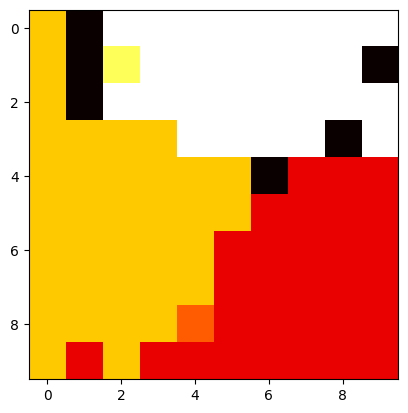

In [15]:
SOM.plotLabelHeatmap(wine_X_pca_numpy, labels)